In [3]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# from http://svn.voreen.org/public/voreen-snapshot/modules/plotting/utils/colormap.cpp
colors = np.array([
    (0.6875, 0.6796875, 0.68359375, 1),
    (0.99609375, 0.7734375, 0.546875, 1),
    (0.5, 0.5, 0.0, 1),
    (0.83203125, 0.57421875, 0.3671875, 1),
    (0.38671875, 0.5, 0.5625, 1),
    (0.25, 0.35546875, 0.26953125, 1),
    (0.35546875, 0.34375, 0.32421875, 1),
    (0.55859375, 0.29296875, 0.1953125, 1),
    (0.5234375, 0.22265625, 0.00390625, 1),
    (0.42578125, 0.40234375, 0.26171875, 1),
    (0.44140625, 0.40625, 0.125, 1),
    (0.4921875, 0.375, 0.2734375, 1),
    ])
colors90 = colors * [(0.9, 0.9, 0.9, 1.0)]
colors81 = colors90 * [(0.9, 0.9, 0.9, 1.0)]

In [17]:
def maxwell_boltzmann(x, a):
    x2 = x**2
    return np.sqrt(2/np.pi) * (x2*np.exp(x2/(-2*a**2))/(a**3))

def max_x(a, b):
    return np.sqrt(2 * np.log((b/a)**3) / (a**-2 - b**-2))

def rm_axis_and_save(fig, basename, dpi=None):
    ax = plt.axis('off')
    fig.axes[0].get_xaxis().set_visible(False)
    fig.axes[0].get_yaxis().set_visible(False)
    fig.patch.set_alpha(0.0)
    plt.savefig(basename + '.png', transparent=True, bbox_inches='tight', pad_inches=0, dpi=dpi)
    plt.savefig(basename + '.svg', transparent=True, bbox_inches='tight', pad_inches=0, dpi=dpi)
    plt.savefig(basename + '.eps', transparent=True, bbox_inches='tight', pad_inches=0, dpi=dpi)
    plt.savefig(basename + '.pdf', transparent=True, bbox_inches='tight', pad_inches=0, dpi=dpi)

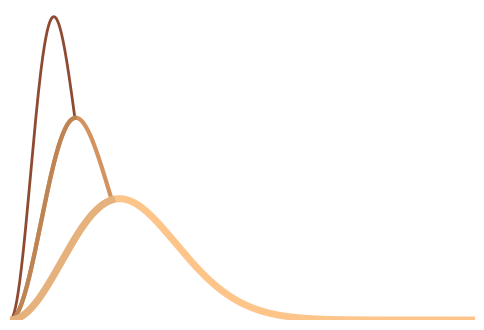

In [18]:
fig = plt.figure()

# main curves
x = np.linspace(0.0, max_x(2.0, 3.0), 201)
plt.plot(x, maxwell_boltzmann(x, 2), lw=2, color=colors[7])
x = np.linspace(0.0, max_x(3.0, 5.0), 201)
plt.plot(x, maxwell_boltzmann(x, 3), lw=3, color=colors[3])
x = np.linspace(0, 30.0, 301)
plt.plot(x, maxwell_boltzmann(x, 5), lw=5, color=colors[1])

# 2-3 shaddow
x = np.linspace(0.0, max_x(2.0, 3.0), 201)
plt.plot(x, maxwell_boltzmann(x, 3), lw=3, color=colors90[3])

# 3-5 shaddow
x = np.linspace(0.0, max_x(3.0, 5.0), 201)
plt.plot(x, maxwell_boltzmann(x, 5), lw=5, color=colors90[1])

# save figure
rm_axis_and_save(fig, '../templates/static/logo-curves')

In [19]:
def create_filled_curves():
    # main curves
    x = np.linspace(0.0, max_x(2.0, 3.0), 201)
    plt.fill_between(x, maxwell_boltzmann(x, 2), lw=1, color=colors[7]) # 2
    x = np.linspace(0.0, max_x(3.0, 5.0), 201)
    plt.fill_between(x, maxwell_boltzmann(x, 3), lw=1, color=colors[3]) # 3
    x = np.linspace(0, 30.0, 301)
    plt.fill_between(x, maxwell_boltzmann(x, 5), lw=1, color=colors[1]) # 5

    # 2-3 shaddow
    x = np.linspace(0.0, max_x(2.0, 3.0), 201)
    plt.fill_between(x, maxwell_boltzmann(x, 3), lw=1, color=colors90[3]) # 3
    x = np.linspace(max_x(2.0, 3.0), 18.0, 201)
    plt.fill_between(x, maxwell_boltzmann(x, 2), lw=1, color=colors90[3]) # 3

    # 3-5 shaddow
    x = np.linspace(0.0, max_x(3.0, 5.0), 201)
    plt.fill_between(x, maxwell_boltzmann(x, 5), lw=1, color=colors90[1]) # 5
    x = np.linspace(max_x(3.0, 5.0), 18.0, 201)
    plt.fill_between(x, maxwell_boltzmann(x, 3), lw=1, color=colors90[1]) # 5

    # 2-5 shaddow
    x = np.linspace(0.0, max_x(2.0, 5.0), 201)
    plt.fill_between(x, maxwell_boltzmann(x, 5), lw=1, color=colors81[1]) # 5
    x = np.linspace(max_x(2.0, 5.0), 12.5, 201)
    plt.fill_between(x, maxwell_boltzmann(x, 2), lw=1, color=colors81[1]) # 5

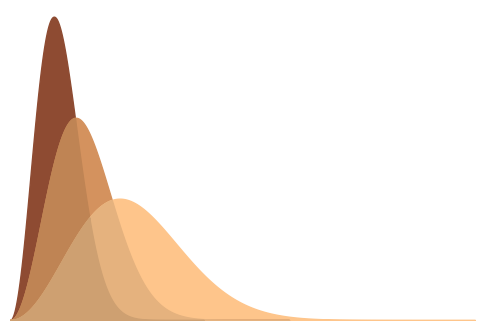

In [20]:
fig = plt.figure()
create_filled_curves()
rm_axis_and_save(fig, '../templates/static/logo-filled')

In [21]:
def imraw(fname, extent=None, aspect=None, dpi=72.0):
    im = plt.imread(fname)
    fig = plt.figure()
    fig.set_size_inches(im.shape[1]/dpi + 0.000001, im.shape[0]/dpi)
    ax = plt.Axes(fig, [0.0, 0.0, 1.0, 1.0])
    ax.set_axis_off()
    fig.add_axes(ax)
    plt.imshow(im, extent=extent, aspect=aspect)
    return fig

def add_text(xpos, ypos, t, size=128, dsize=4, dx=0.005, dy=-0.004, family='serif'):
    plt.figtext(xpos, ypos+(2*dy), t, size=size+dsize*2, color=colors[7], family=family)
    plt.figtext(xpos+dx, ypos+dy, t, size=size+dsize, color=colors[3], family=family)
    plt.figtext(xpos+(2*dx), ypos, t, size=size, color=colors[1], family=family)

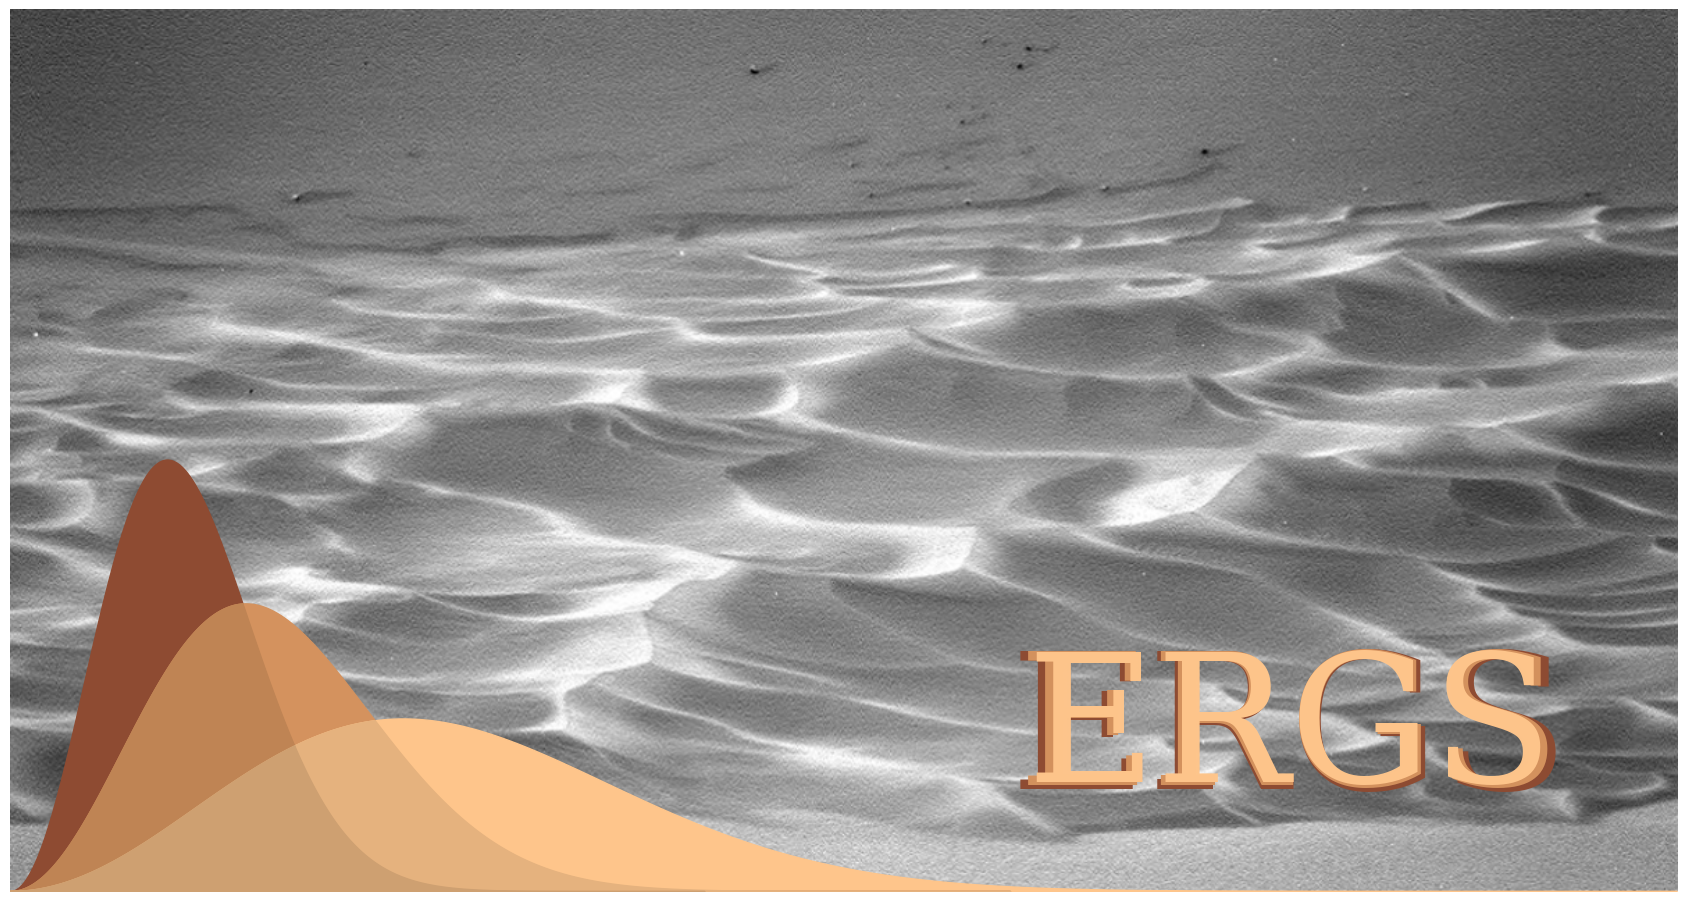

In [22]:
# http://mars.nasa.gov/mer/gallery/all/1/p/101/1P137152747EFF2019P2571L7M1.HTML
fig = imraw('sol_101_1P137152747EFF2019P2571L7M1.png', extent=(0, 30.0, 0, 0.6), aspect='auto')
add_text(0.60, 0.125, 'ERGS')
create_filled_curves()
rm_axis_and_save(fig, '../templates/static/logo-banner', dpi=72)

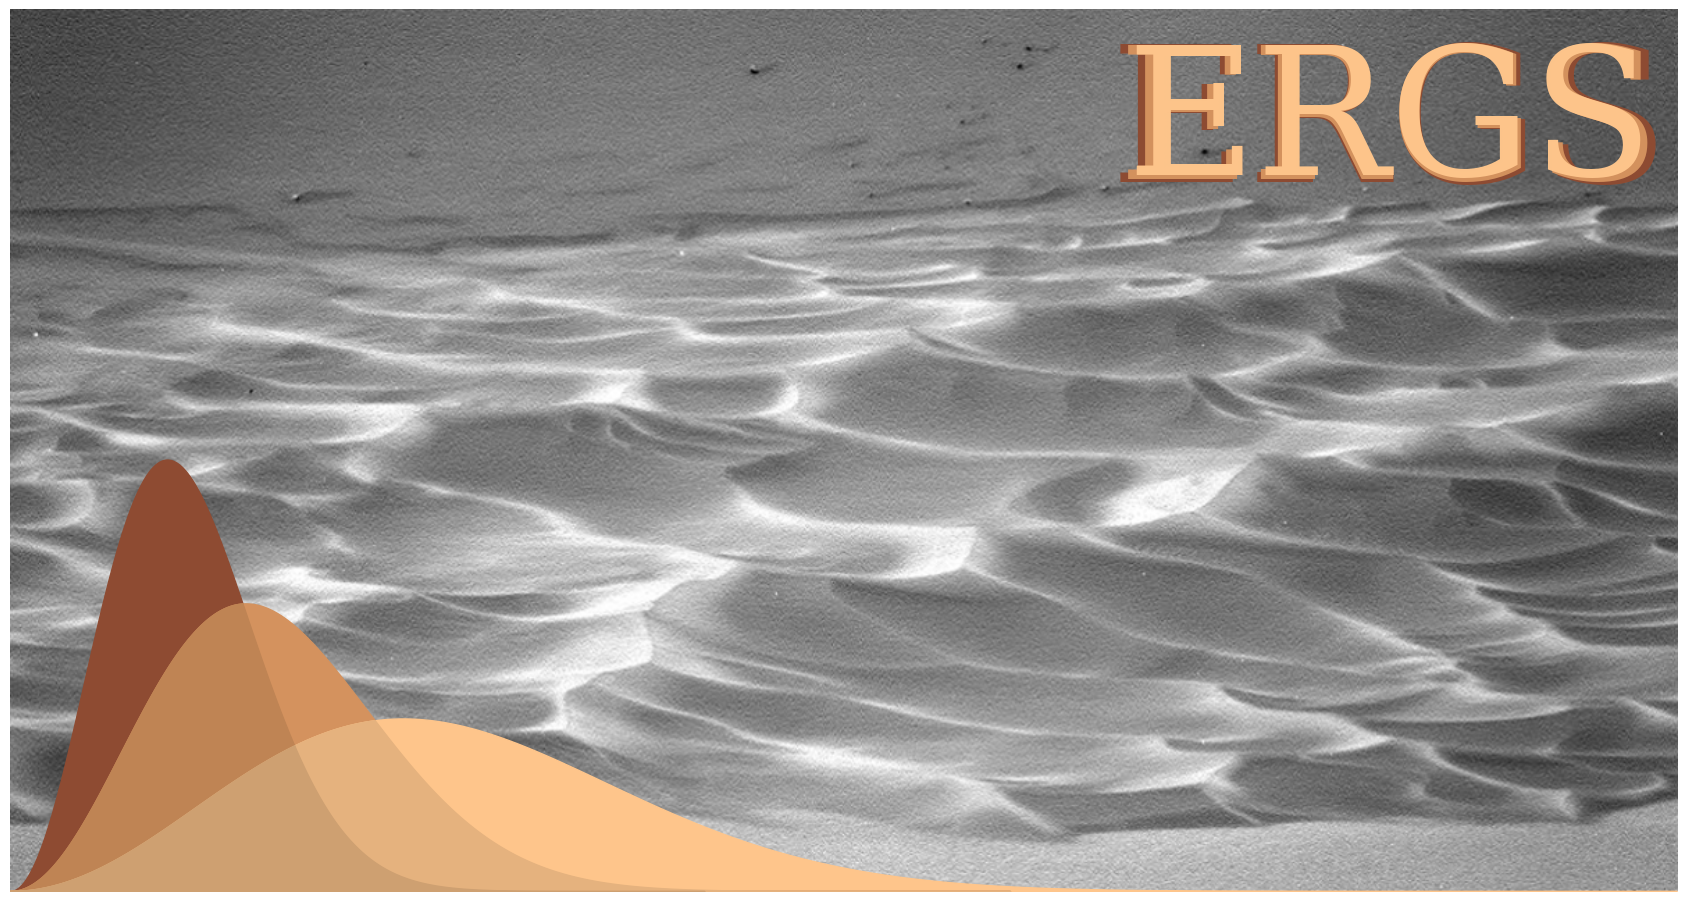

In [23]:
# http://mars.nasa.gov/mer/gallery/all/1/p/101/1P137152747EFF2019P2571L7M1.HTML
fig = imraw('sol_101_1P137152747EFF2019P2571L7M1.png', extent=(0, 30.0, 0, 0.6), aspect='auto')
add_text(0.66, 0.8125, 'ERGS')
create_filled_curves()
rm_axis_and_save(fig, '../templates/static/logo-banner-text-upper', dpi=72)

In [10]:
fig.get_figwidth() * 72

1200.0000720000003